Esports Development Analysis base on earning and tournament from 1998 to 2021.

According to Wikipedia -
    Esports, short for electronic sports, is a form of competition using video games. Esports often takes the form of organized, multiplayer video game competitions, particularly between professional players, individually or as teams.
    
    Although organized competitions have long been a part of video game culture, these were largely between amateurs until the late 2000s, when participation by professional gamers and spectatorship in these events through live streaming saw a large surge in popularity.  By the 2010s, esports was a significant factor in the video game industry, with many game developers actively designing and providing funding for tournaments and other events.
   
   With the passion with Esports so many years, I have been experiencing with the underestimate of old generation about consider esports pro players as a professional job and especially considering Esports as a wonderful industry which develop national economic. 

In the notebook I will try to shine some light on this growing industry by using Python Data Analysis

This dataset comes entirely from EsportsEarnings.com.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import datetime
import plotly.express as px
from collections import Counter

1.	Import package and loading dataset

In [2]:
esport = pd.read_csv("GeneralEsportData.csv", encoding = "ISO-8859-1")
tour_esport = pd.read_csv("HistoricalEsportData.csv", encoding = "ISO-8859-1")
player = pd.read_csv("highest_earning_players.csv", encoding = "ISO-8859-1")
country = pd.read_csv("country-and-continent-codes-list.csv", encoding = "ISO-8859-1")
team = pd.read_csv("highest_earning_teams.csv", encoding = "ISO-8859-1")

In [3]:
esport

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79
4,Age of Empires Online,2011,Strategy,5356.56,775.00,25,17
...,...,...,...,...,...,...,...
553,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.00,170000.00,39,3
554,Knockout City,2021,Third-Person Shooter,0.00,0.00,0,0
555,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,100.00,0.00,6,1
556,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2


In [4]:
tour_esport

,Date,Game,Earnings,Players,Tournaments
0,1/1/1998,QuakeWorld,15000.00,8,1
1,5/1/1998,Quake II,14600.00,4,1
2,7/1/1998,Quake II,15000.00,5,1
3,7/1/1998,QuakeWorld,6500.00,4,1
4,11/1/1998,Quake II,36600.00,13,2
...,...,...,...,...,...
7336,12/1/2021,Assetto Corsa Competizione,400.00,6,1
7337,12/1/2021,rFactor 2,359.95,17,1
7338,12/1/2021,Age of Mythology,300.00,4,1
7339,12/1/2021,Blaston,200.00,3,1


In [5]:
player

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,HÃ¸jsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [6]:
country

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [7]:
team

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


Also, I will manipulate the Date variable into a date format, I will add a variable indicating the year and the month I will edit some of the genres to not be too long (which will interfere with plotting). I also add “PrizePerPlayer” column to tour_esport dataset 

In [8]:
tour_esport.Date = pd.to_datetime(tour_esport.Date).dt.strftime('%m/%Y')
tour_esport

,Date,Game,Earnings,Players,Tournaments
0,01/1998,QuakeWorld,15000.00,8,1
1,05/1998,Quake II,14600.00,4,1
2,07/1998,Quake II,15000.00,5,1
3,07/1998,QuakeWorld,6500.00,4,1
4,11/1998,Quake II,36600.00,13,2
...,...,...,...,...,...
7336,12/2021,Assetto Corsa Competizione,400.00,6,1
7337,12/2021,rFactor 2,359.95,17,1
7338,12/2021,Age of Mythology,300.00,4,1
7339,12/2021,Blaston,200.00,3,1


In [9]:
tour_esport[["Month", "Year"]] = tour_esport.Date.str.split('/', expand=True)
tour_esport[["Month", "Year"]] = tour_esport[[ "Month", "Year"]].astype(int)
tour_esport

,Date,Game,Earnings,Players,Tournaments,Month,Year
0,01/1998,QuakeWorld,15000.00,8,1,1,1998
1,05/1998,Quake II,14600.00,4,1,5,1998
2,07/1998,Quake II,15000.00,5,1,7,1998
3,07/1998,QuakeWorld,6500.00,4,1,7,1998
4,11/1998,Quake II,36600.00,13,2,11,1998
...,...,...,...,...,...,...,...
7336,12/2021,Assetto Corsa Competizione,400.00,6,1,12,2021
7337,12/2021,rFactor 2,359.95,17,1,12,2021
7338,12/2021,Age of Mythology,300.00,4,1,12,2021
7339,12/2021,Blaston,200.00,3,1,12,2021


In [10]:
esport["Genre"]=esport["Genre"].replace(["Multiplayer Online Battle Arena"], "MOBA")
esport["Genre"]=esport["Genre"].replace(["Role-Playing"], "RPG")
esport["Genre"]=esport["Genre"].replace(["Third-Person Shooter"], "TPS")
esport["Genre"]=esport["Genre"].replace(["First-Person Shooter"], "FPS")
print(esport["Genre"].unique())

['Strategy' 'FPS' 'MOBA' 'Role-Playing Game' 'Fighting Game' 'Racing'
 'Sports' 'Collectible Card Game' 'Puzzle Game' 'Battle Royale' 'TPS']


In [12]:
tour_esport["Date"]= pd.to_datetime(tour_esport["Date"])
tour_esport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7341 entries, 0 to 7340
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7341 non-null   datetime64[ns]
 1   Game            7341 non-null   object        
 2   Earnings        7341 non-null   float64       
 3   Players         7341 non-null   int64         
 4   Tournaments     7341 non-null   int64         
 5   Month           7341 non-null   int32         
 6   Year            7341 non-null   int32         
 7   PrizePerPlayer  7332 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(1)
memory usage: 401.6+ KB


In [13]:
tour_esport["PrizePerPlayer"]= tour_esport["Earnings"]/tour_esport["Players"]
tour_esport

,Date,Game,Earnings,Players,Tournaments,Month,Year,PrizePerPlayer
0,1998-01-01,QuakeWorld,15000.00,8,1,1,1998,1875.000000
1,1998-05-01,Quake II,14600.00,4,1,5,1998,3650.000000
2,1998-07-01,Quake II,15000.00,5,1,7,1998,3000.000000
3,1998-07-01,QuakeWorld,6500.00,4,1,7,1998,1625.000000
4,1998-11-01,Quake II,36600.00,13,2,11,1998,2815.384615
...,...,...,...,...,...,...,...,...
7336,2021-12-01,Assetto Corsa Competizione,400.00,6,1,12,2021,66.666667
7337,2021-12-01,rFactor 2,359.95,17,1,12,2021,21.173529
7338,2021-12-01,Age of Mythology,300.00,4,1,12,2021,75.000000
7339,2021-12-01,Blaston,200.00,3,1,12,2021,66.666667


Also I will manipulate player data and the country data so these two dataset can merge together:

•	On the Player dataset, I will  upper case all value on “CountryCode” Column to match with the value in Country column

•	Secondly, on Country dataset, I will change the “Two_Letter_Country_Code” column name to “CountryCode”, delelte 2 columns "Three_Letter_Country_Code" and "Country_Number" since we will not gonna using them

•	Finally, I also create a new column named “FullNameAndGame” to make it easier to visualize the data later

In [14]:
player["CountryCode"]=player["CountryCode"].str.upper()
country = country.drop(columns=["Three_Letter_Country_Code","Country_Number"])
country = country.rename(columns={"Two_Letter_Country_Code": "CountryCode"})

In [15]:
player = player.merge(country, on="CountryCode", how='left')
player

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Continent_Name,Continent_Code,Country_Name
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of"
1,3679,Andreas,HÃ¸jsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of"
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of"
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of"
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of"
...,...,...,...,...,...,...,...,...,...,...,...
1027,7400,Janne,Mikkonen,Savjz,FI,50734.44,Hearthstone,Collectible Card Game,Europe,EU,"Finland, Republic of"
1028,3255,Drew,Biessener,Tidesoftime,US,50449.60,Hearthstone,Collectible Card Game,North America,NaN,United States of America
1029,49164,Simone,Liguori,Leta,IT,49300.00,Hearthstone,Collectible Card Game,Europe,EU,"Italy, Italian Republic"
1030,43043,Mike,Eichner,Ike,US,48550.00,Hearthstone,Collectible Card Game,North America,NaN,United States of America


In [31]:
player["FullNameAndGame"]= player["NameFirst"]+" "+player["CurrentHandle"]+" "+player["NameLast"]+"."+player["Game"]
player

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Continent_Name,Continent_Code,Country_Name,FullNameAndGame
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",Peter dupreeh Rasmussen.Counter-Strike: Global...
1,3679,Andreas,HÃ¸jsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",Andreas Xyp9x HÃ¸jsleth.Counter-Strike: Global...
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",Nicolai dev1ce Reedtz.Counter-Strike: Global O...
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",Lukas gla1ve Rossander.Counter-Strike: Global ...
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,"Denmark, Kingdom of",Emil Magisk Reif.Counter-Strike: Global Offensive
...,...,...,...,...,...,...,...,...,...,...,...,...
1027,7400,Janne,Mikkonen,Savjz,FI,50734.44,Hearthstone,Collectible Card Game,Europe,EU,"Finland, Republic of",Janne Savjz Mikkonen.Hearthstone
1028,3255,Drew,Biessener,Tidesoftime,US,50449.60,Hearthstone,Collectible Card Game,North America,NaN,United States of America,Drew Tidesoftime Biessener.Hearthstone
1029,49164,Simone,Liguori,Leta,IT,49300.00,Hearthstone,Collectible Card Game,Europe,EU,"Italy, Italian Republic",Simone Leta Liguori.Hearthstone
1030,43043,Mike,Eichner,Ike,US,48550.00,Hearthstone,Collectible Card Game,North America,NaN,United States of America,Mike Ike Eichner.Hearthstone


2.	Data Cleaning

In [16]:
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1031
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PlayerId        1032 non-null   int64  
 1   NameFirst       1032 non-null   object 
 2   NameLast        1032 non-null   object 
 3   CurrentHandle   1032 non-null   object 
 4   CountryCode     1032 non-null   object 
 5   TotalUSDPrize   1032 non-null   float64
 6   Game            1032 non-null   object 
 7   Genre           1032 non-null   object 
 8   Continent_Name  1032 non-null   object 
 9   Continent_Code  879 non-null    object 
 10  Country_Name    1032 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 96.8+ KB


In [17]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Continent_Name  262 non-null    object
 1   Continent_Code  219 non-null    object
 2   Country_Name    262 non-null    object
 3   CountryCode     261 non-null    object
dtypes: object(4)
memory usage: 8.3+ KB


In [18]:
esport.info()
tour_esport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              558 non-null    object 
 1   ReleaseDate       558 non-null    int64  
 2   Genre             558 non-null    object 
 3   TotalEarnings     558 non-null    float64
 4   OnlineEarnings    558 non-null    float64
 5   TotalPlayers      558 non-null    int64  
 6   TotalTournaments  558 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 30.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7341 entries, 0 to 7340
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7341 non-null   datetime64[ns]
 1   Game            7341 non-null   object        
 2   Earnings        7341 non-null   float64       
 3   Players         7341 non-null   int64  

In [19]:
esport.isnull().count()

Game                558
ReleaseDate         558
Genre               558
TotalEarnings       558
OnlineEarnings      558
TotalPlayers        558
TotalTournaments    558
dtype: int64

In [20]:
tour_esport.isnull().count()

Date              7341
Game              7341
Earnings          7341
Players           7341
Tournaments       7341
Month             7341
Year              7341
PrizePerPlayer    7341
dtype: int64

In [21]:
player.isnull().count()

PlayerId          1032
NameFirst         1032
NameLast          1032
CurrentHandle     1032
CountryCode       1032
TotalUSDPrize     1032
Game              1032
Genre             1032
Continent_Name    1032
Continent_Code    1032
Country_Name      1032
dtype: int64

In [22]:
country.isnull().count()

Continent_Name    262
Continent_Code    262
Country_Name      262
CountryCode       262
dtype: int64

Data seems is in the right order and data type now. Also, there is not any missing information in the dataset

3.	Data Analysis

a.	Oldest and Newest Game

Besides the ReleaseDate, I am wondering which game is the oldest game…


In [23]:
esport[esport['ReleaseDate']==esport['ReleaseDate'].min()]

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
524,Pac-man,1981,Puzzle Game,0.0,0.0,0,0


… and the newest game in our list

In [24]:
esport[esport['ReleaseDate']==esport['ReleaseDate'].max()]

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79
25,Legion TD 2,2021,Strategy,0.00,0.00,0,0
85,Call of Duty: Vanguard,2021,FPS,626500.00,0.00,128,16
123,Lemnis Gate,2021,FPS,572.86,0.00,5,4
171,Crab Game,2021,MOBA,45950.00,44000.00,32,11
181,League of Legends: Wild Rift,2021,MOBA,1024288.00,679288.00,178,4
186,Pokemon Unite,2021,MOBA,0.00,0.00,0,0
243,Guilty Gear -STRIVE-,2021,Fighting Game,93490.89,42497.57,124,34
275,Melty Blood: Type Lumina,2021,Fighting Game,2004.59,2004.59,8,1
276,Mighty Fight Federation,2021,Fighting Game,100.00,0.00,3,1


b.	Biggest Games (earning wise)

C:\Users\vuana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


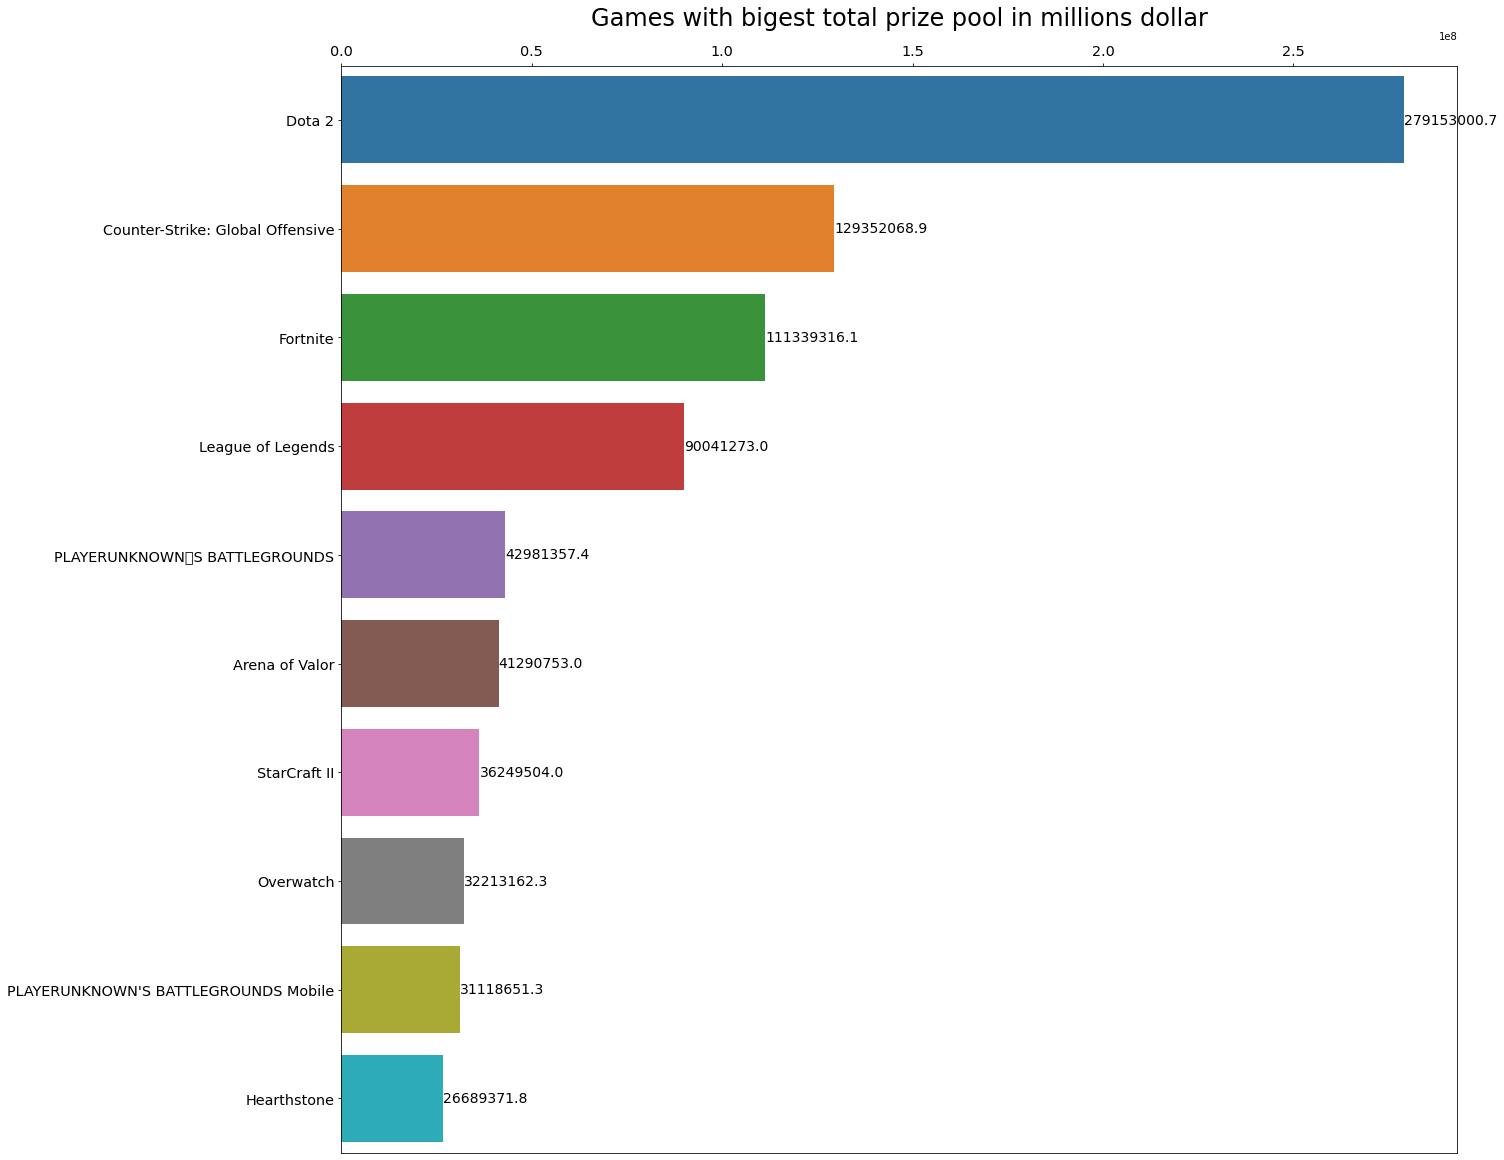

In [25]:
earning_game = esport[["Game", "TotalEarnings"]]
earning_game = earning_game.sort_values(by=["TotalEarnings"], ascending=False)
top10game = np.array(earning_game["Game"].head(10))
earning = np.array(earning_game["TotalEarnings"].head(10))
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(x=earning, y=top10game, data=earning_game)
plt.title("Games with bigest total prize pool in millions dollar", fontsize=24)
ax.xaxis.tick_top()
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

In the top 10 biggest games, there are no apparent surprises, we find Dota 2, CS:GO, Fortnite, League of Legends, and Starcraft 2 at the top.

Text(0.5, 1.0, 'Percent of prize pool')

C:\Users\vuana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


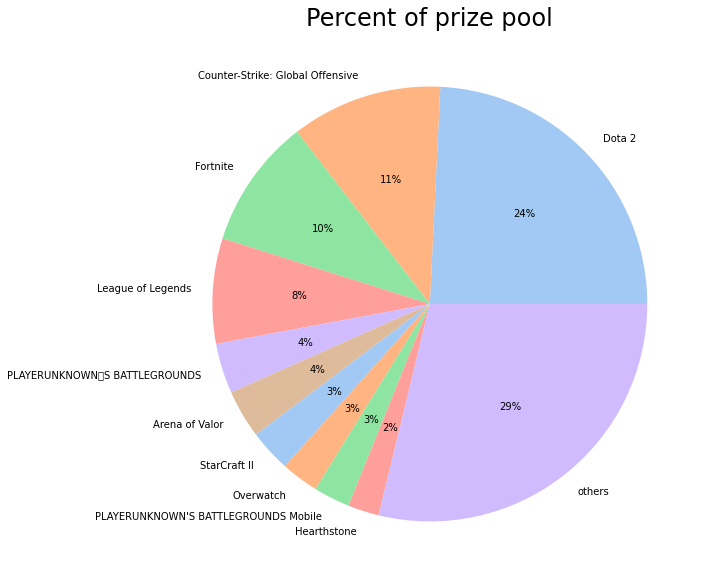

In [26]:
percent_earning = esport[["Game", "TotalEarnings"]]
percent_earning = percent_earning.sort_values(by=["TotalEarnings"], ascending=False)
percent_earning["PercentEarning"]= esport["TotalEarnings"]/sum(esport["TotalEarnings"])*100
percent_earningtop10 = percent_earning[:10].copy()
totallowpercent = pd.DataFrame(data = {
    "Game" : ["others"],
    "PercentEarning" : [percent_earning["PercentEarning"][10:].sum()]
})
top10_others = pd.concat([percent_earningtop10, totallowpercent])
top10game = np.array(top10_others["Game"])
percent = np.array(top10_others["PercentEarning"])
fig, ax = plt.subplots(figsize=(10,10))
colors = sns.color_palette('pastel')[0:6]
plt.pie(percent, labels = top10game,colors = colors, autopct="%.0f%%")
plt.title("Percent of prize pool", fontsize=24)

We can see that the earnings are highly concentrated: almost 50% of the earnings are concentrated in 3 games and about 75% of the total earnings come from the biggest 10 games. Also, it is quite shocking that about a quarter of all prize pool earnings have came solely from Dota 2 tournaments.

Now let’s see which games held the highest amount of tournaments.

c.	Biggest Games (tournament wise).

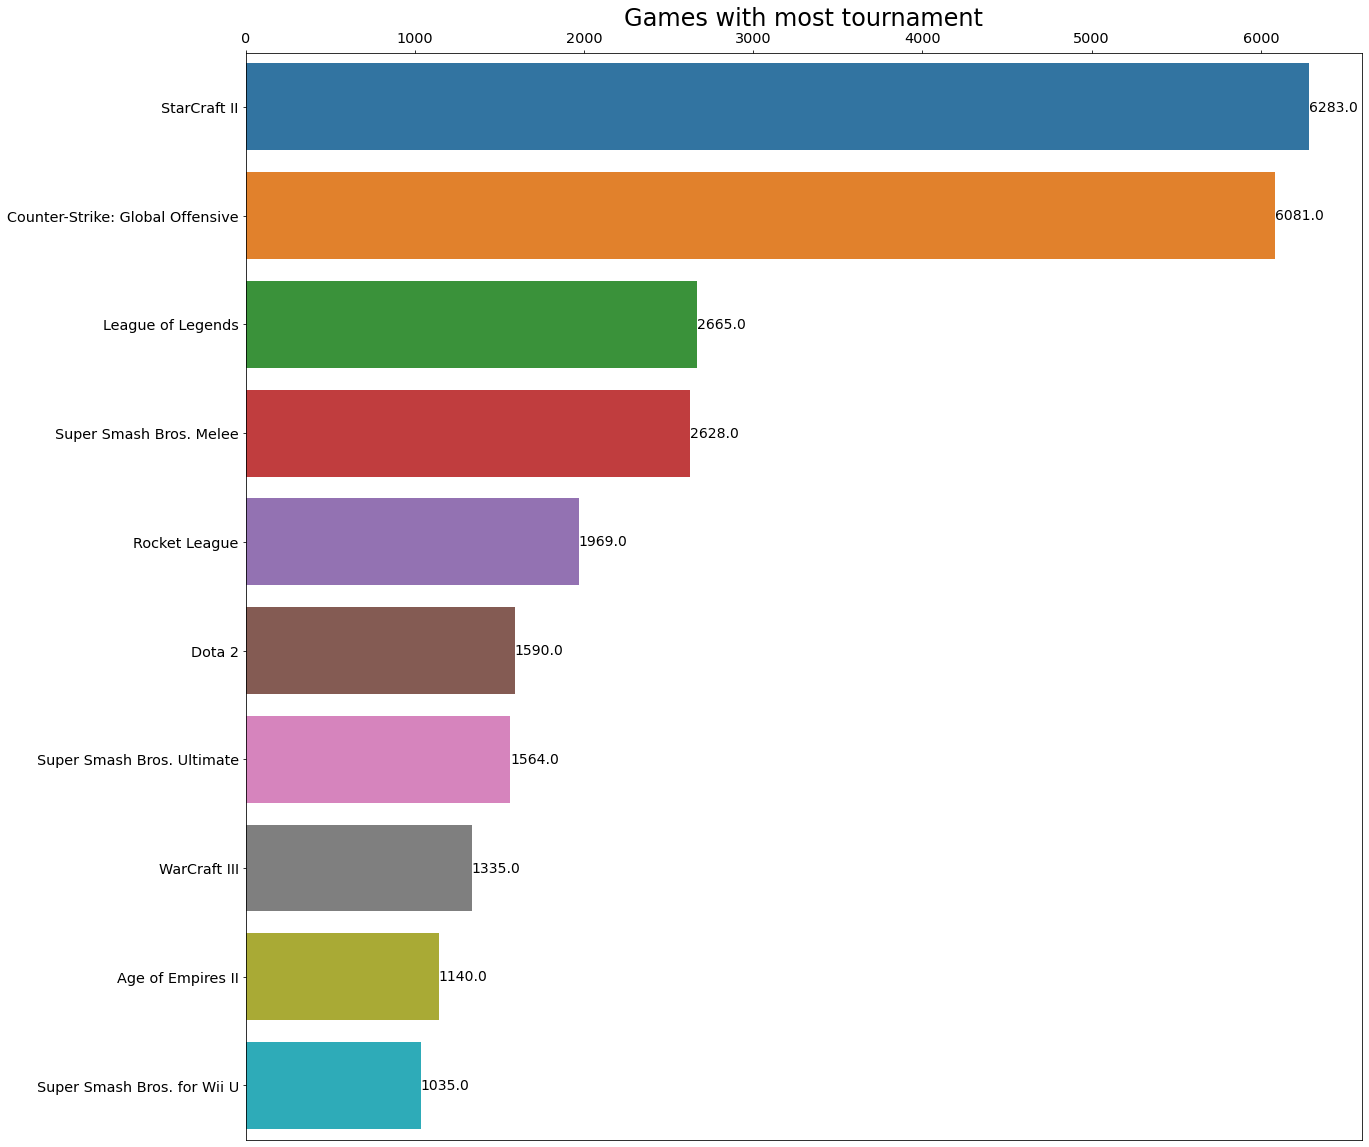

In [27]:
Tournament_total= esport[["Game", "TotalTournaments"]]
Tournament_total = Tournament_total.sort_values(by=["TotalTournaments"], ascending=False)
top10game = np.array(Tournament_total["Game"].head(10))
Tournament = np.array(Tournament_total["TotalTournaments"].head(10))
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Games with most tournament", fontsize=24)
sns.barplot(x=Tournament, y=top10game, data=Tournament_total)
ax.xaxis.tick_top()
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

It is not surprising that we find a similarity between the two lists: Dota 2, StarCraft 2, League of Legends and Counter-Strike: Global Offensive are all in the top 10 in prize pool earnings.

What is somewhat interesting is the fact that we have 3 different Super Smash Bros. games, all in the top 10, this is while being not as big in the matter of prize pools (1.2M, 1.5M and 3.1M).

Text(0.5, 1.0, 'Percent of Tournaments')

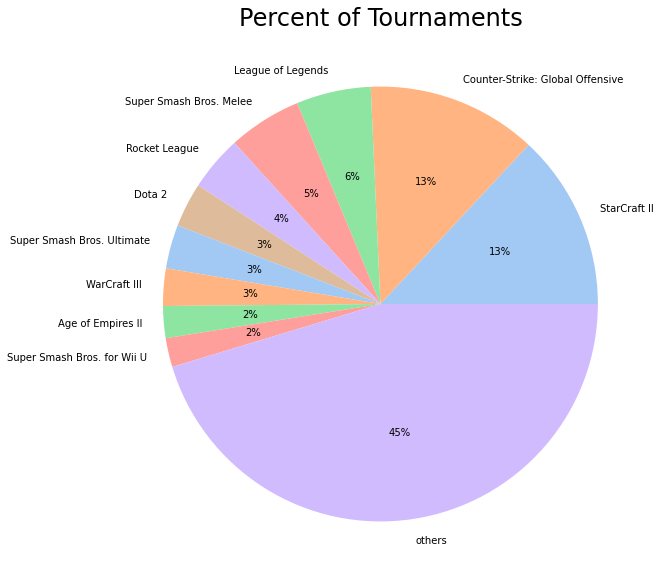

In [28]:
Tournament_percent= esport[["Game", "TotalTournaments"]]
Tournament_percent = Tournament_percent.sort_values(by=["TotalTournaments"], ascending=False)
Tournament_percent["PercentTournaments"]= esport["TotalTournaments"]/sum(esport["TotalTournaments"])*100
Tournament_percenttop10 = Tournament_percent[:10].copy()
totallowpercent2 = pd.DataFrame(data = {
    "Game" : ["others"],
    "PercentTournaments" : [Tournament_percent["PercentTournaments"][10:].sum()]
})
top10_others2 = pd.concat([Tournament_percenttop10, totallowpercent2])
top10game2 = np.array(top10_others2["Game"])
percent2 = np.array(top10_others2["PercentTournaments"])
fig, ax = plt.subplots(figsize=(10,10))
colors = sns.color_palette('pastel')[0:6]
plt.pie(percent2, labels = top10game2,colors = colors, autopct="%.0f%%")
plt.title("Percent of Tournaments", fontsize=24)

Indeed, tournaments are a little less concentrated then earnings.

Now let take a look at which E-sport games have the most pro player

d.	Popular games

C:\Users\vuana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


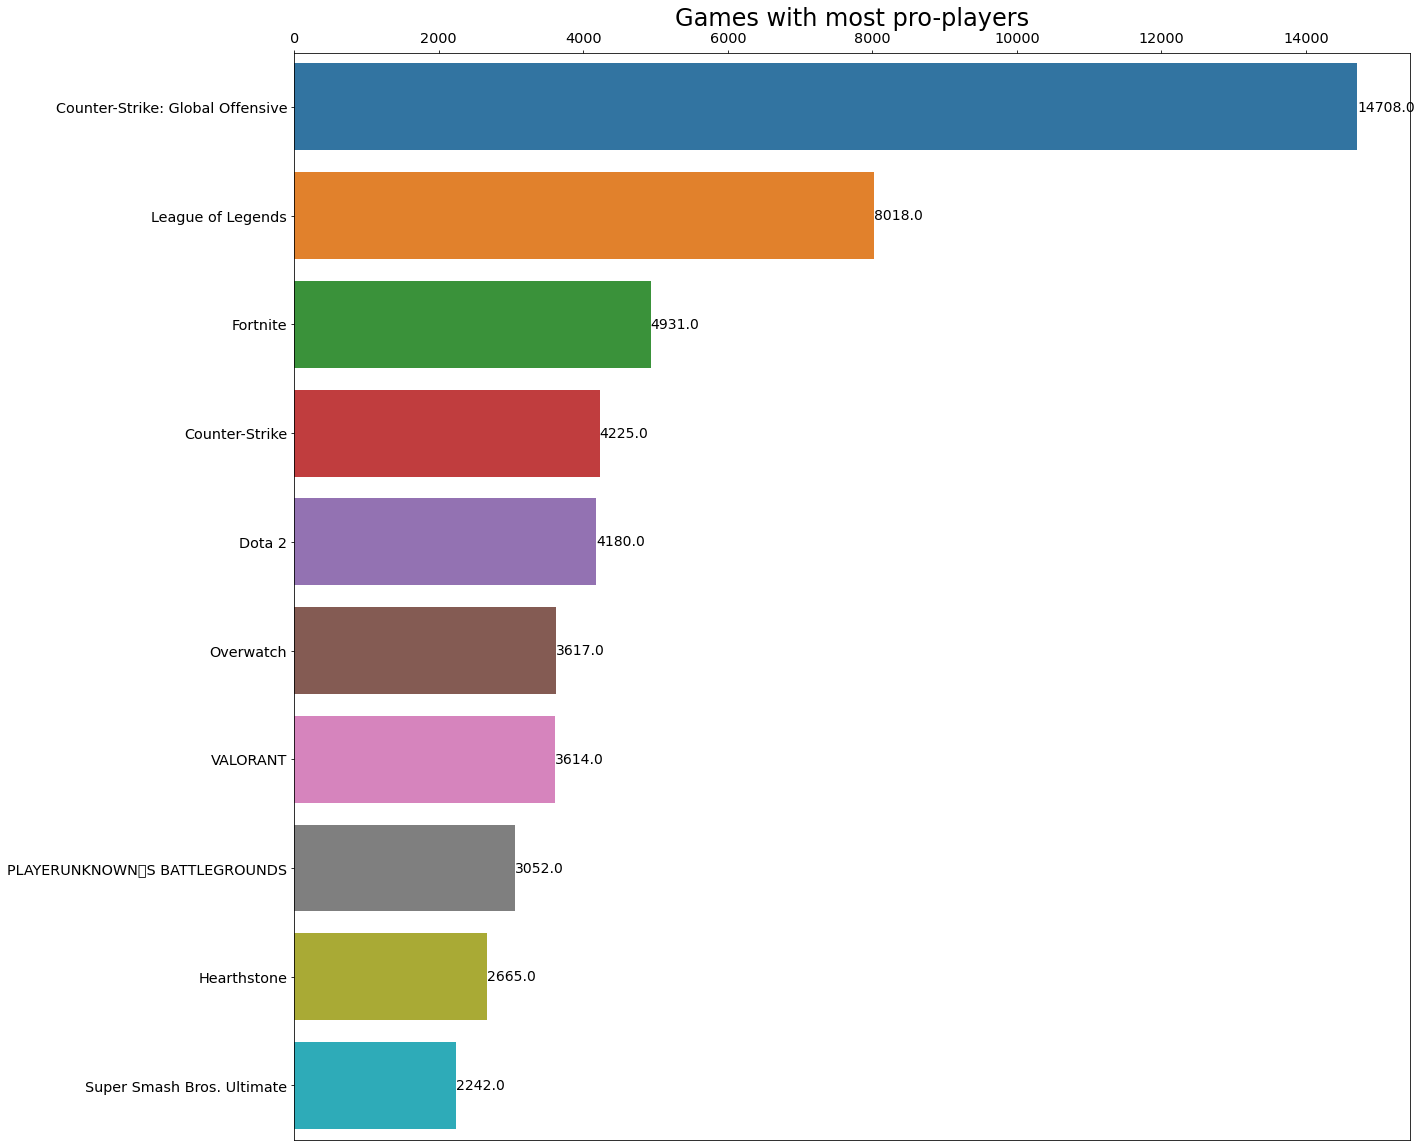

In [29]:
player_total= esport[["Game", "TotalPlayers"]]
player_total = player_total.sort_values(by=["TotalPlayers"], ascending=False)
top10game = np.array(player_total["Game"].head(10))
player2 = np.array(player_total["TotalPlayers"].head(10))
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Games with most pro-players", fontsize=24)
sns.barplot(x=player2, y=top10game, data=player_total)
ax.xaxis.tick_top()
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

It is interesting to note that in this list, most games are either played in teams of 5 or are a part of the Battle Royal genre in which each match could hold up to 100 players. however, 2 games stand out, Hearthstone , StarCraft II (in positions 8, 9): These games are exclusively 1v1 based (there is an option for 2v2 in starcraft, however there are not compatitive compatitions for this mode).

Text(0.5, 1.0, 'Percent of Players')

C:\Users\vuana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


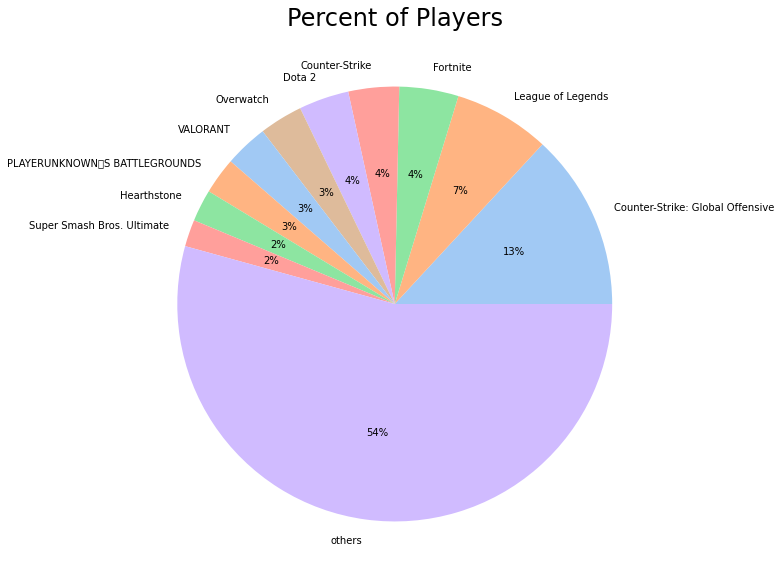

In [30]:
player_percent= esport[["Game", "TotalPlayers"]]
player_percent = player_percent.sort_values(by=["TotalPlayers"], ascending=False)
player_percent["PercentPlayers"]= esport["TotalPlayers"]/sum(esport["TotalPlayers"])*100
player_percenttop10 = player_percent[:10].copy()
totallowpercent3 = pd.DataFrame(data = {
    "Game" : ["others"],
    "PercentPlayers" : [player_percent["PercentPlayers"][10:].sum()]
})
top10_others2 = pd.concat([player_percenttop10, totallowpercent3])
top10game2 = np.array(top10_others2["Game"])
percent2 = np.array(top10_others2["PercentPlayers"])
fig, ax = plt.subplots(figsize=(10,10))
colors = sns.color_palette('pastel')[0:6]
plt.pie(percent2, labels = top10game2,colors = colors, autopct="%.0f%%")
plt.title("Percent of Players", fontsize=24)

Indeed, pro players are even more less concentrated then tournament. Even with the huge number of CS:GO players, they just only took 13% of the total pro-players.

e. Pro players with the highest earning.

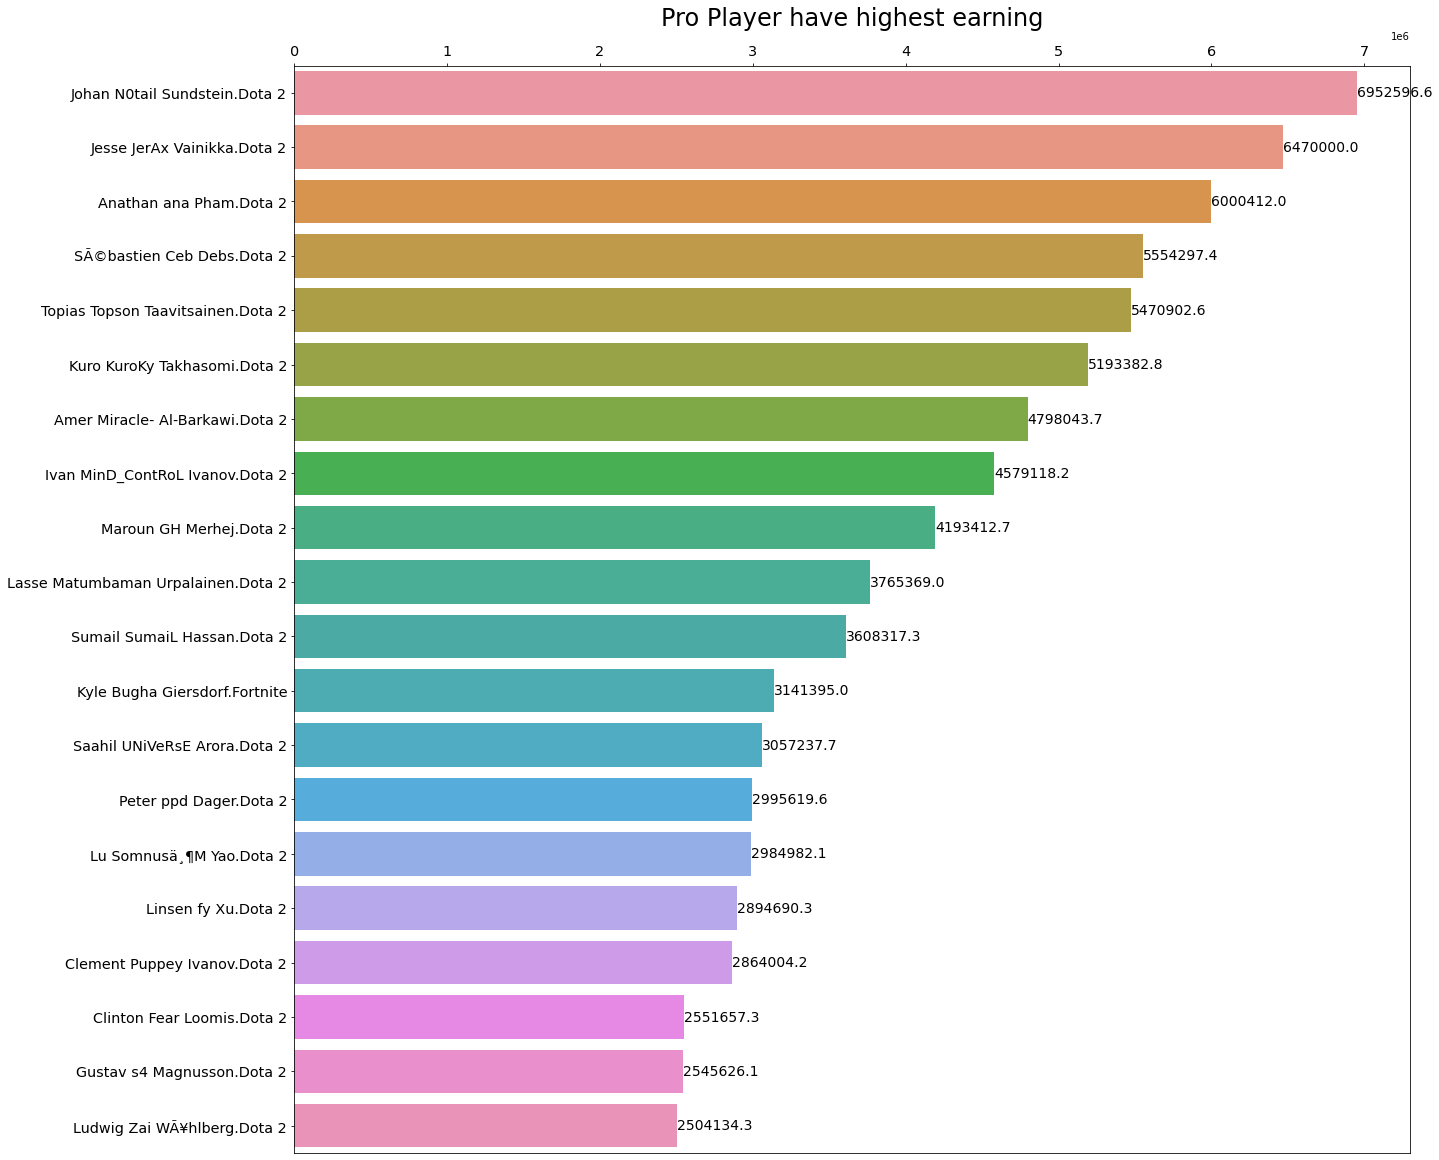

In [34]:
player_topearning= player[["FullNameAndGame", "TotalUSDPrize"]]
player_topearning = player_topearning.sort_values(by=["TotalUSDPrize"], ascending=False)
top10player = np.array(player_topearning["FullNameAndGame"].head(20))
player10 = np.array(player_topearning["TotalUSDPrize"].head(20))
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Pro Player have highest earning", fontsize=24)
sns.barplot(x=player10, y=top10player, data=player_topearning)
ax.xaxis.tick_top()
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

It is very interesting that most of the top 20 pro-players have the highest earning are playing DOTA 2 while only top 12 Kyle "Bugha" Giersdorf is playing Fortnite. you can see that the how big impact of DOTA 2 on the E-sport community.

Now we gonna look at the Esport teams/companies

f. A look at top e-sport teams/companies

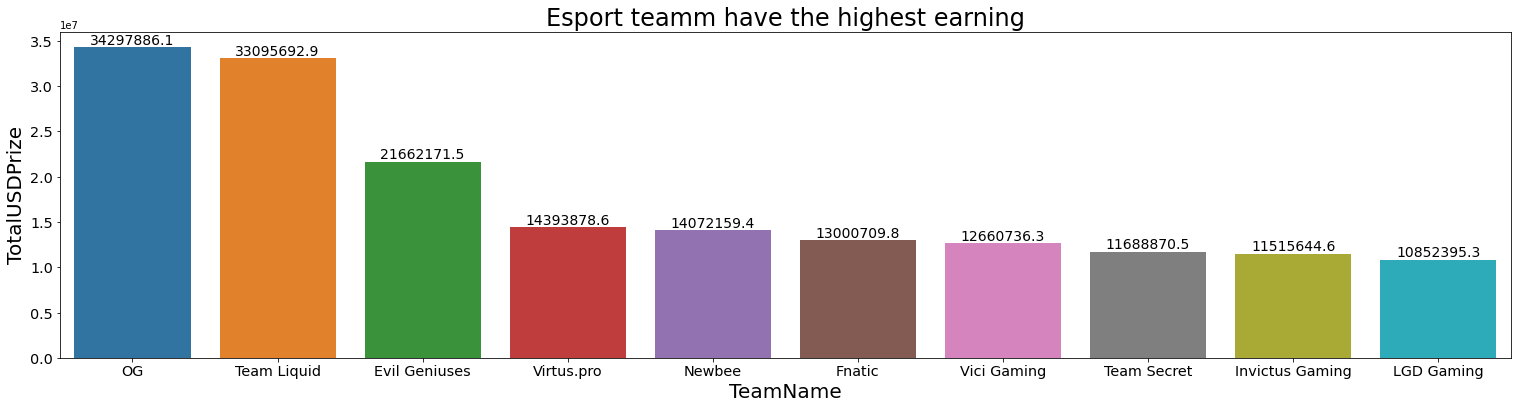

In [35]:
team_highearning = team.groupby("TeamName").agg({"TotalUSDPrize": np.sum})
team_highearning = team_highearning.sort_values(by=["TotalUSDPrize"], ascending=False)
team_highearning.reset_index(inplace=True)
team_highearning = team_highearning.head(10)
team_highearning.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="TeamName", y="TotalUSDPrize", data = team_highearning)
plt.title("Esport teamm have the highest earning", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

Text(0.5, 1.0, 'Percent of Team Earning')

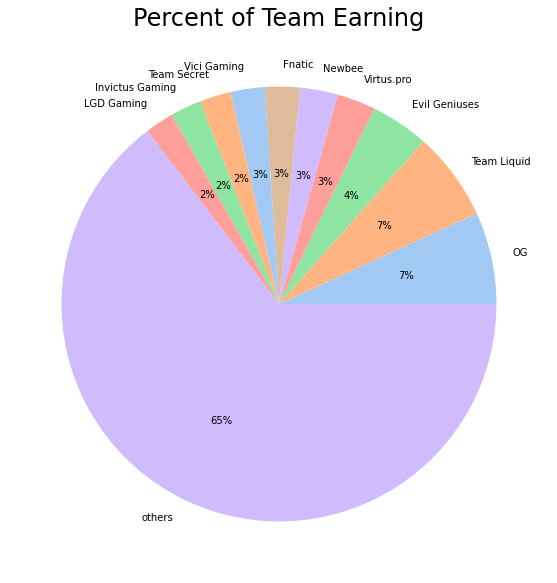

In [36]:
team_percent = team.groupby("TeamName").agg({"TotalUSDPrize": np.sum})
team_percent2 = team_percent.sort_values(by=["TotalUSDPrize"], ascending=False)
team_percent2["PercentEarningTeam"]= team_percent2["TotalUSDPrize"]/sum(team_percent2["TotalUSDPrize"])*100
team_percenthigh10 = team_percent2[:10].copy()
teamlowpercent = pd.DataFrame(data = {
    "TeamName" : ["others"],
    "PercentEarningTeam" : [team_percent2["PercentEarningTeam"][10:].sum()],
    "TotalUSDPrize" : [team_percent2["TotalUSDPrize"][10:].sum()]
})
team_percenthigh10=team_percenthigh10.reset_index()
top10team_others = (pd.concat([team_percenthigh10, teamlowpercent])).reset_index()
top10team_others=top10team_others[["TeamName","TotalUSDPrize","PercentEarningTeam"]]
highteam = np.array(top10team_others["TeamName"])
percenthighteam = np.array(top10team_others["PercentEarningTeam"])
fig, ax = plt.subplots(figsize=(10,10))
colors = sns.color_palette('pastel')[0:6]
plt.pie(percenthighteam, labels = highteam, colors = colors, autopct="%.0f%%")
plt.title("Percent of Team Earning", fontsize=24)

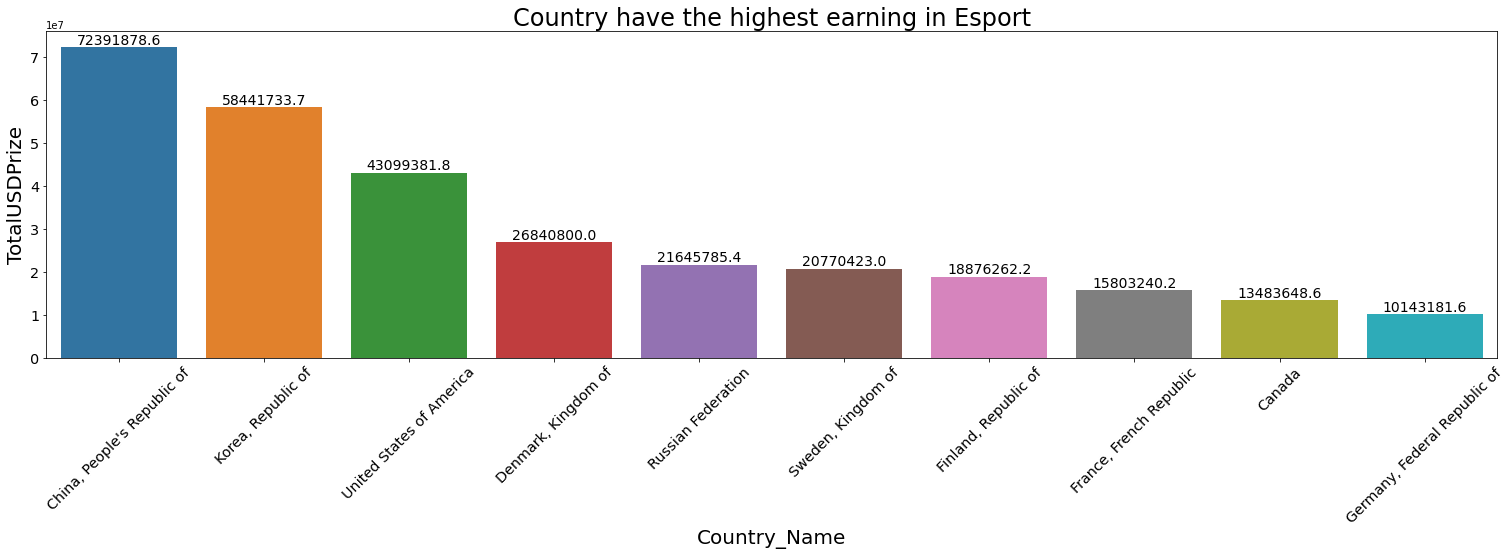

In [36]:
country_highearning = player.groupby("Country_Name").agg({"TotalUSDPrize": np.sum})
country_highearning = country_highearning.sort_values(by=["TotalUSDPrize"], ascending=False)
country_highearning.reset_index(inplace=True)
country_highearning = country_highearning.head(10)
country_highearning.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Country_Name", y="TotalUSDPrize", data = country_highearning)
plt.title("Country have the highest earning in Esport", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

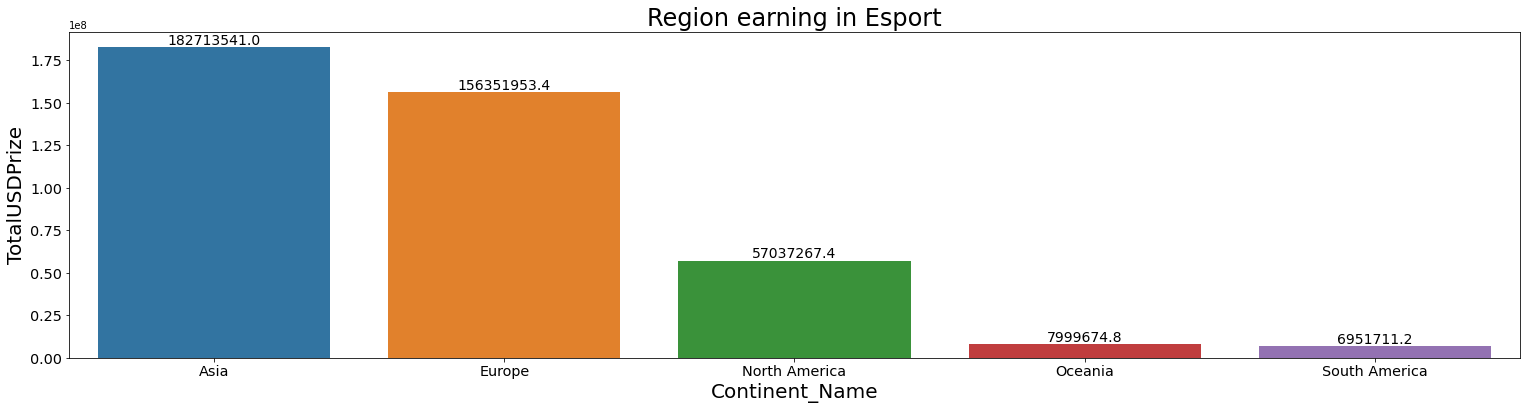

In [37]:
continent_highearning = player.groupby("Continent_Name").agg({"TotalUSDPrize": np.sum})
continent_highearning = continent_highearning.sort_values(by=["TotalUSDPrize"], ascending=False)
continent_highearning.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Continent_Name", y="TotalUSDPrize", data = continent_highearning)
plt.title("Region earning in Esport", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

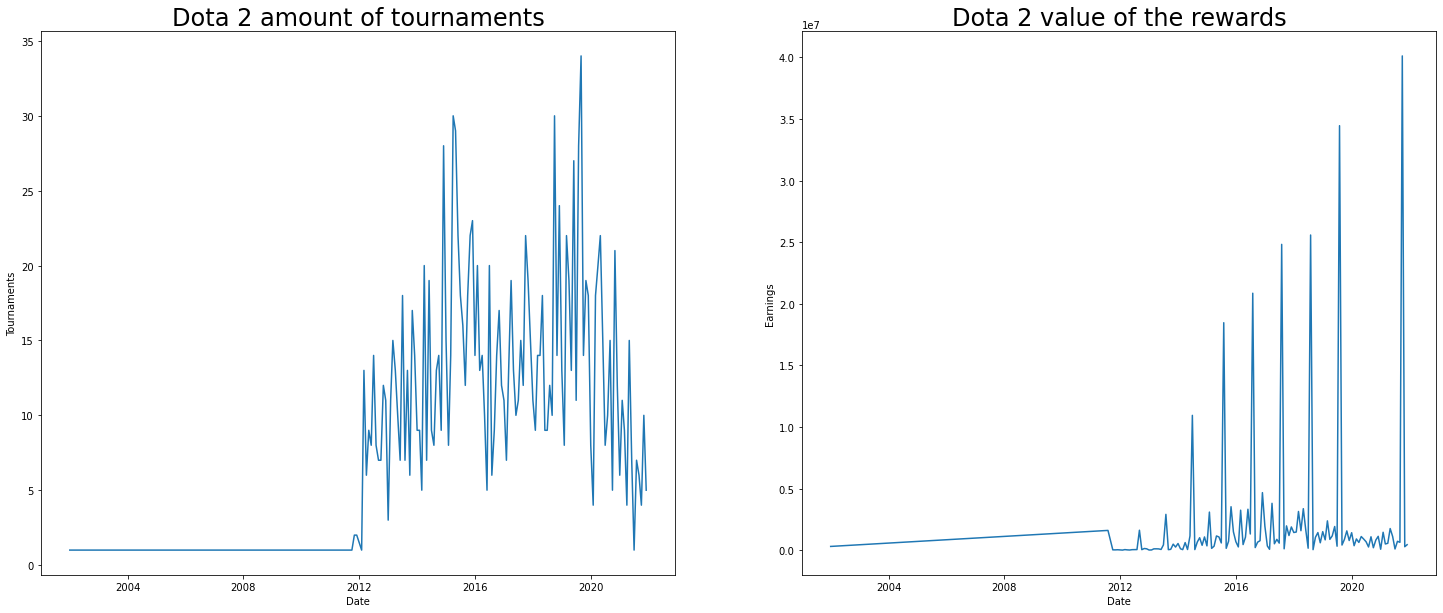

In [38]:
esport_dota2 = tour_esport[tour_esport["Game"] == "Dota 2"]
esport_dota2 = esport_dota2.groupby(["Date"]).agg({"Tournaments": np.sum, "Earnings": np.mean})
esport_dota2.reset_index(inplace=True)
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("Dota 2 amount of tournaments", fontsize=24)
ax = sns.lineplot(x="Date",y="Tournaments",data=esport_dota2)
plt.subplot(1,2,2)
plt.title("Dota 2 value of the rewards", fontsize=24)
ax = sns.lineplot(x="Date", y="Earnings",data=esport_dota2)
plt.show()

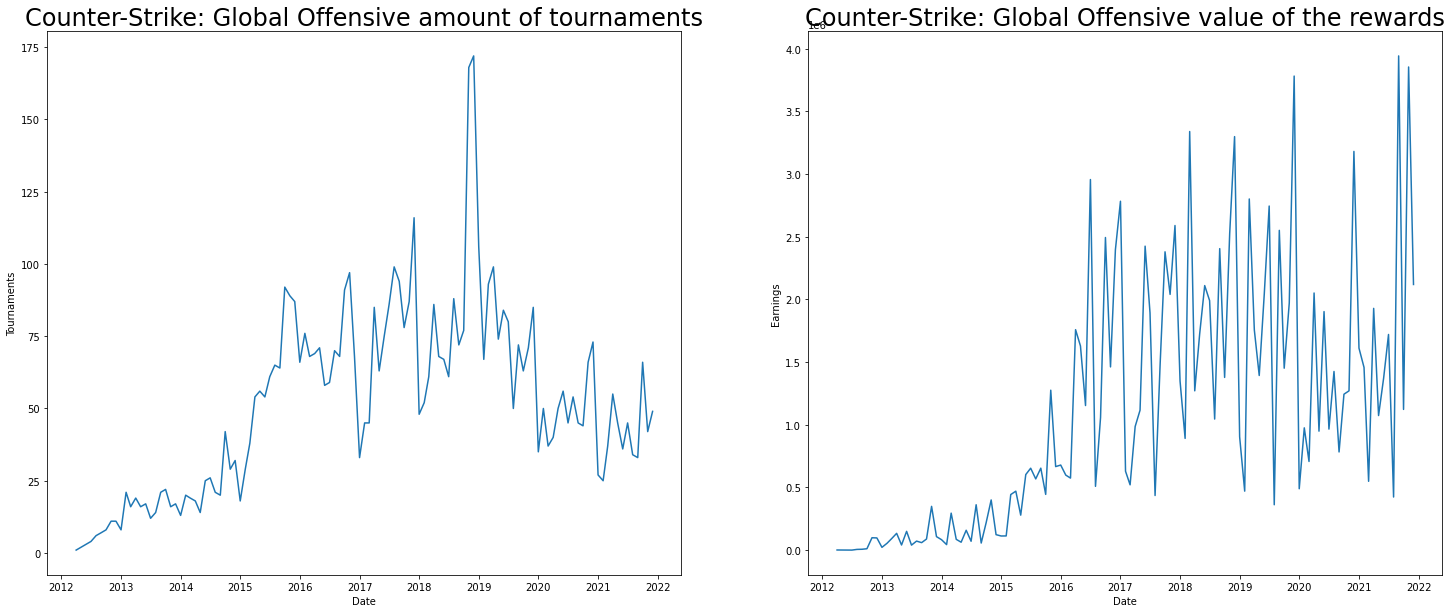

In [39]:
esport_csgo = tour_esport[tour_esport["Game"] == "Counter-Strike: Global Offensive"]
esport_csgo = esport_csgo.groupby(["Date"]).agg({"Tournaments": np.sum, "Earnings": np.mean})
esport_csgo.reset_index(inplace=True)
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("Counter-Strike: Global Offensive amount of tournaments", fontsize=24)
ax = sns.lineplot(x="Date",y="Tournaments",data=esport_csgo)
plt.subplot(1,2,2)
plt.title("Counter-Strike: Global Offensive value of the rewards", fontsize=24)
ax = sns.lineplot(x="Date", y="Earnings",data=esport_csgo)
plt.show()

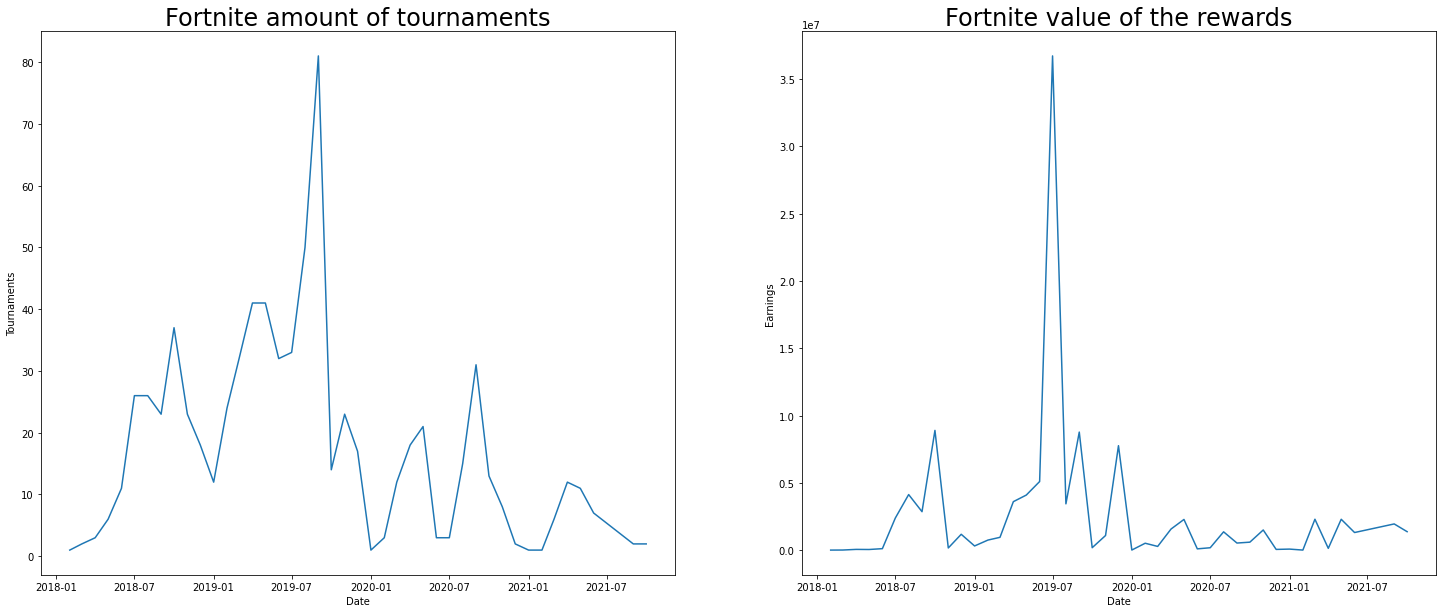

In [40]:
esport_fortnite = tour_esport[tour_esport["Game"] == "Fortnite"]
esport_fortnite = esport_fortnite.groupby(["Date"]).agg({"Tournaments": np.sum, "Earnings": np.mean})
esport_fortnite.reset_index(inplace=True)
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("Fortnite amount of tournaments", fontsize=24)
ax = sns.lineplot(x="Date",y="Tournaments",data=esport_fortnite)
plt.subplot(1,2,2)
plt.title("Fortnite value of the rewards", fontsize=24)
ax = sns.lineplot(x="Date", y="Earnings",data=esport_fortnite)
plt.show()

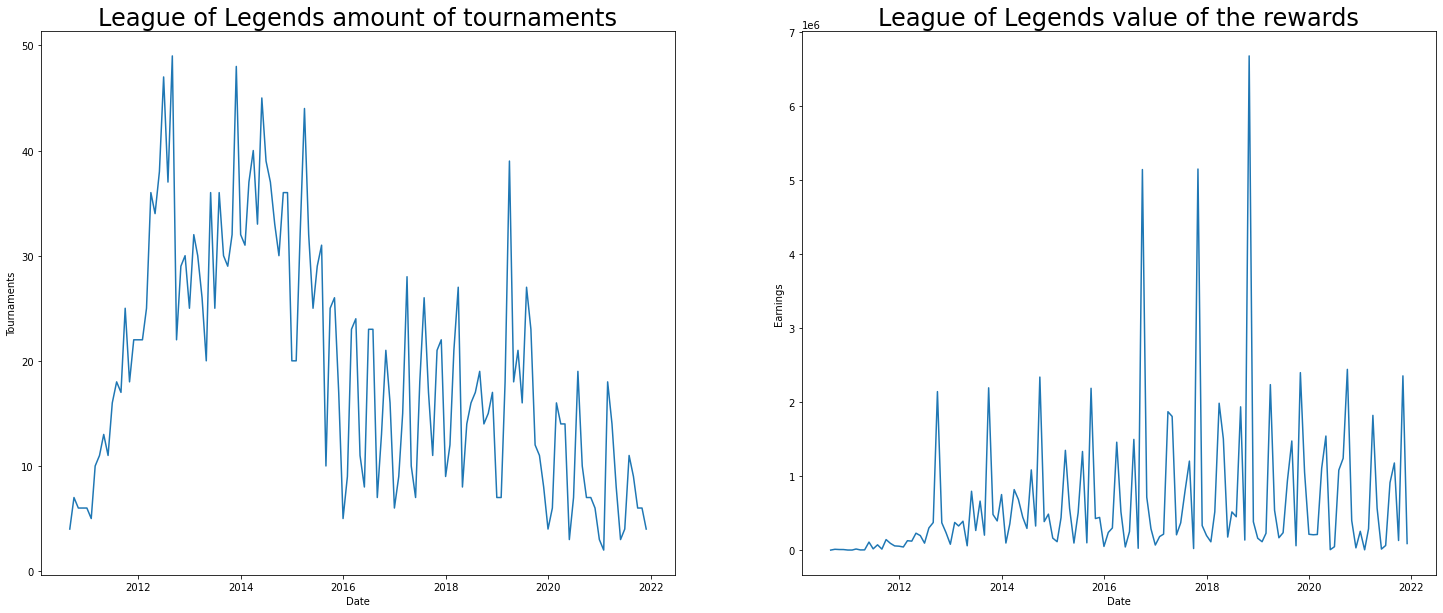

In [41]:
esport_lol = tour_esport[tour_esport["Game"] == "League of Legends"]
esport_lol = esport_lol.groupby(["Date"]).agg({"Tournaments": np.sum, "Earnings": np.mean})
esport_lol.reset_index(inplace=True)
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("League of Legends amount of tournaments", fontsize=24)
ax = sns.lineplot(x="Date",y="Tournaments",data=esport_lol)
plt.subplot(1,2,2)
plt.title("League of Legends value of the rewards", fontsize=24)
ax = sns.lineplot(x="Date", y="Earnings",data=esport_lol)
plt.show()

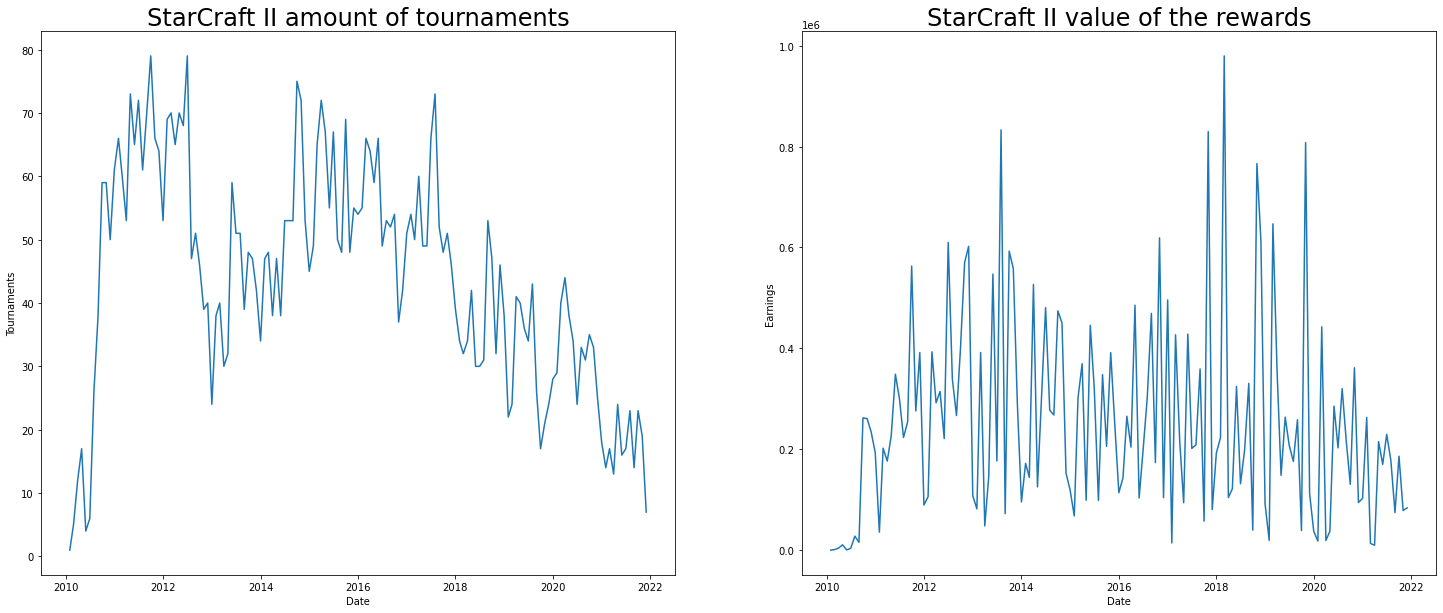

In [42]:
esport_sc2 = tour_esport[tour_esport["Game"] == "StarCraft II"]
esport_sc2 = esport_sc2.groupby(["Date"]).agg({"Tournaments": np.sum, "Earnings": np.mean})
esport_sc2.reset_index(inplace=True)
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("StarCraft II amount of tournaments", fontsize=24)
ax = sns.lineplot(x="Date",y="Tournaments",data=esport_sc2)
plt.subplot(1,2,2)
plt.title("StarCraft II value of the rewards", fontsize=24)
ax = sns.lineplot(x="Date", y="Earnings",data=esport_sc2)
plt.show()

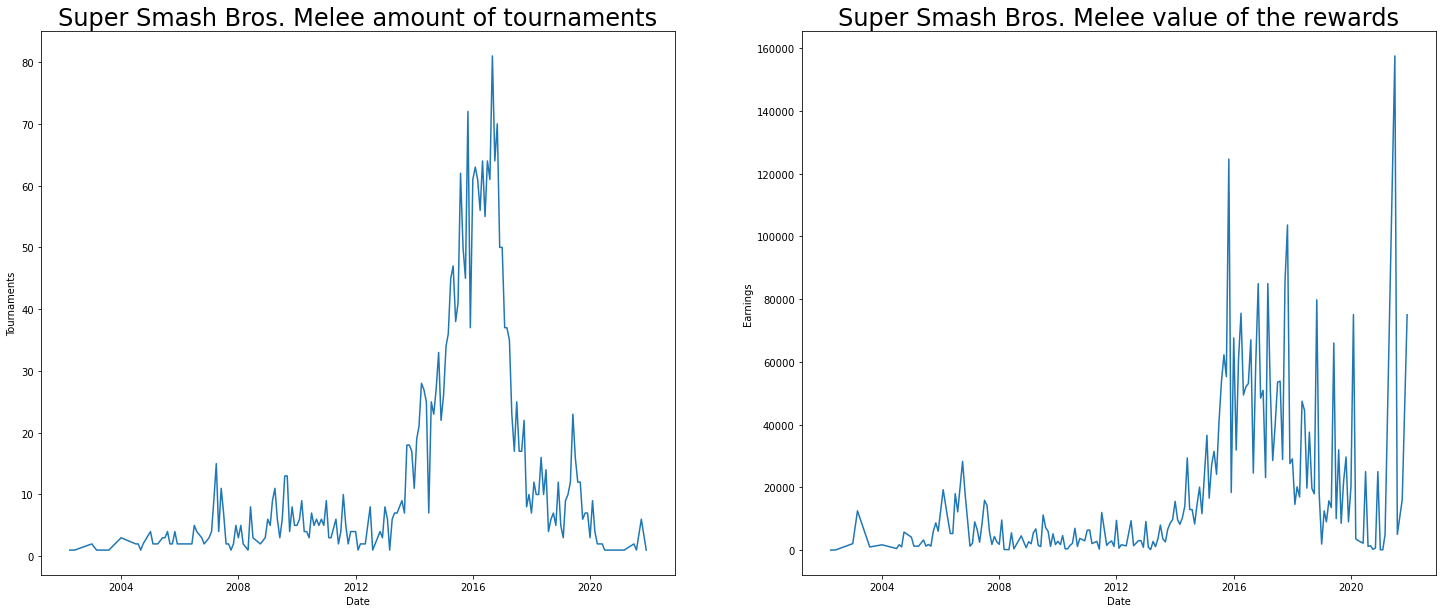

In [43]:
esport_smbm = tour_esport[tour_esport["Game"] == "Super Smash Bros. Melee"]
esport_smbm = esport_smbm.groupby(["Date"]).agg({"Tournaments": np.sum, "Earnings": np.mean})
esport_smbm.reset_index(inplace=True)
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("Super Smash Bros. Melee amount of tournaments", fontsize=24)
ax = sns.lineplot(x="Date",y="Tournaments",data=esport_smbm)
plt.subplot(1,2,2)
plt.title("Super Smash Bros. Melee value of the rewards", fontsize=24)
ax = sns.lineplot(x="Date", y="Earnings",data=esport_smbm)
plt.show()

 A look at Genres


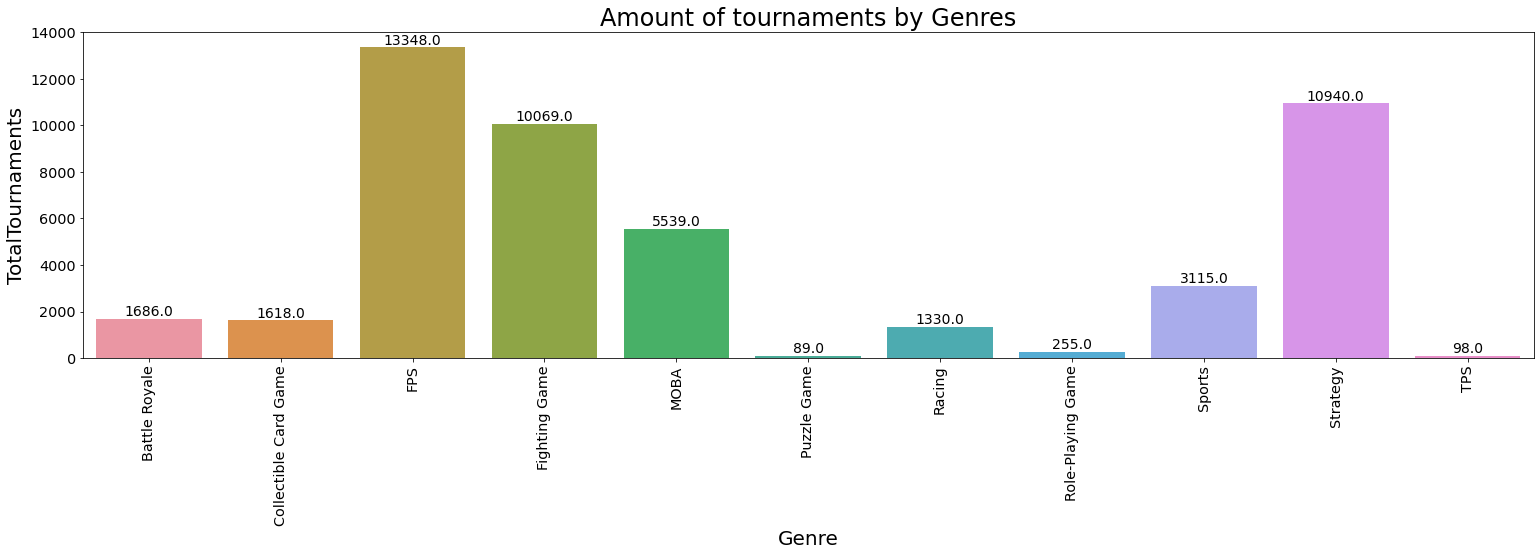

In [44]:
esport_domination_tour = esport.groupby("Genre").agg({"TotalTournaments": np.sum})
esport_domination_tour.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Genre", y="TotalTournaments", data = esport_domination_tour)
plt.title("Amount of tournaments by Genres", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

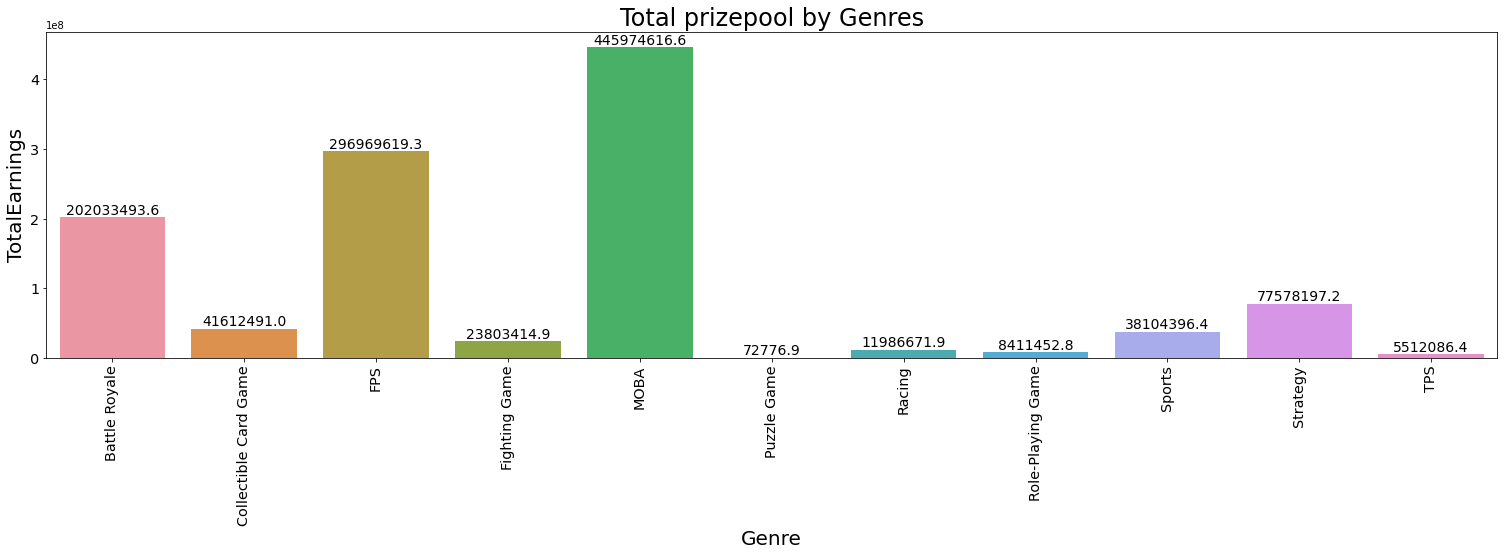

In [45]:
esport_domination_totalprize = esport.groupby("Genre").agg({"TotalEarnings": np.sum})
esport_domination_totalprize.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Genre", y="TotalEarnings", data = esport_domination_totalprize)
plt.title("Total prizepool by Genres", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

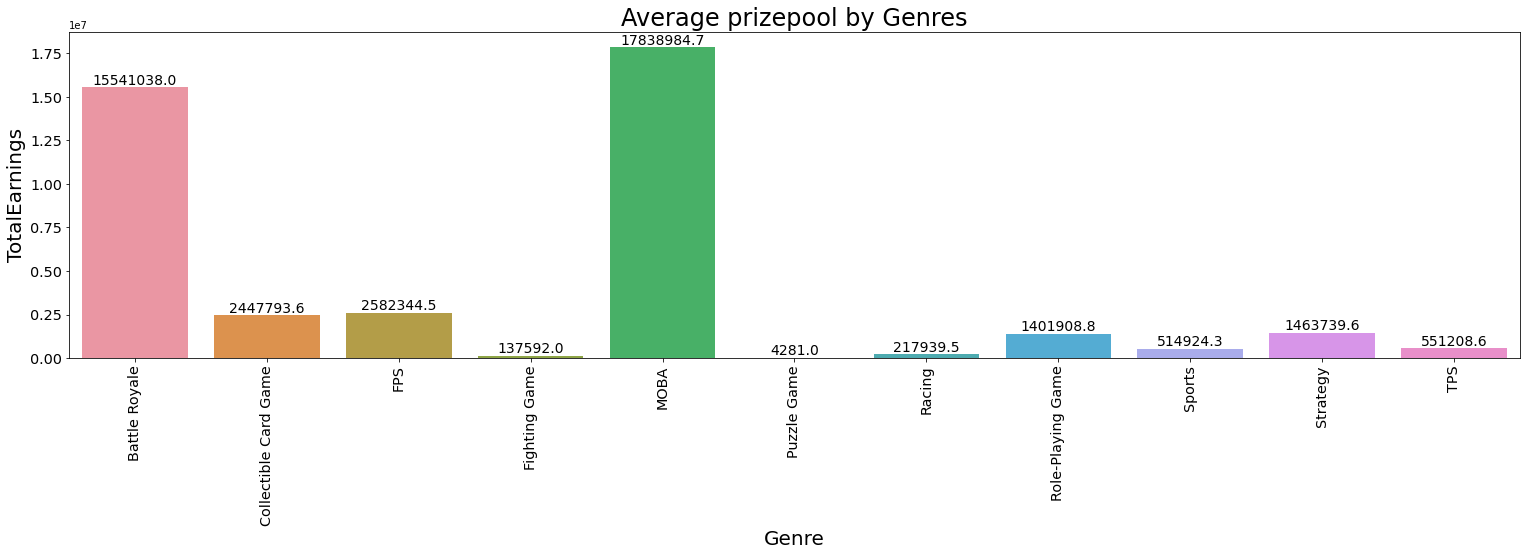

In [46]:
esport_domination_avgprize = esport.groupby("Genre").agg({"TotalEarnings": np.average})
esport_domination_avgprize.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Genre", y="TotalEarnings", data = esport_domination_avgprize)
plt.title("Average prizepool by Genres", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

As expected, the MOBA genre is largly on top of the earning leaderboard, it is followed by the First-person shooter genre and by the quite new Battle Royale genre.
We see that games in the MOBA and Battle Royale genres are a lot more successful in relation to other genres, this makes since as the games in these are designed to be esport compatible.

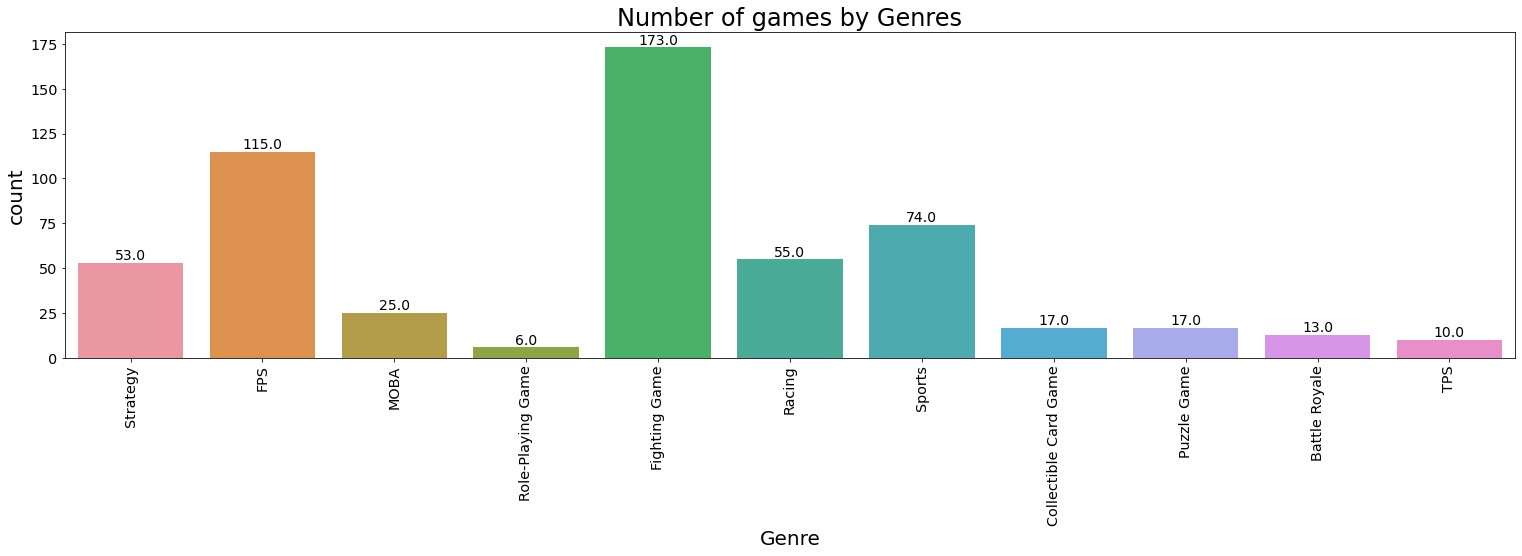

In [42]:
esport_domination = Counter(esport["Genre"])
fig, ax = plt.subplots(figsize=(26,6))
plt.title("Number of games by Genres", fontsize=24)
sns.countplot(x=esport["Genre"])
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show() 

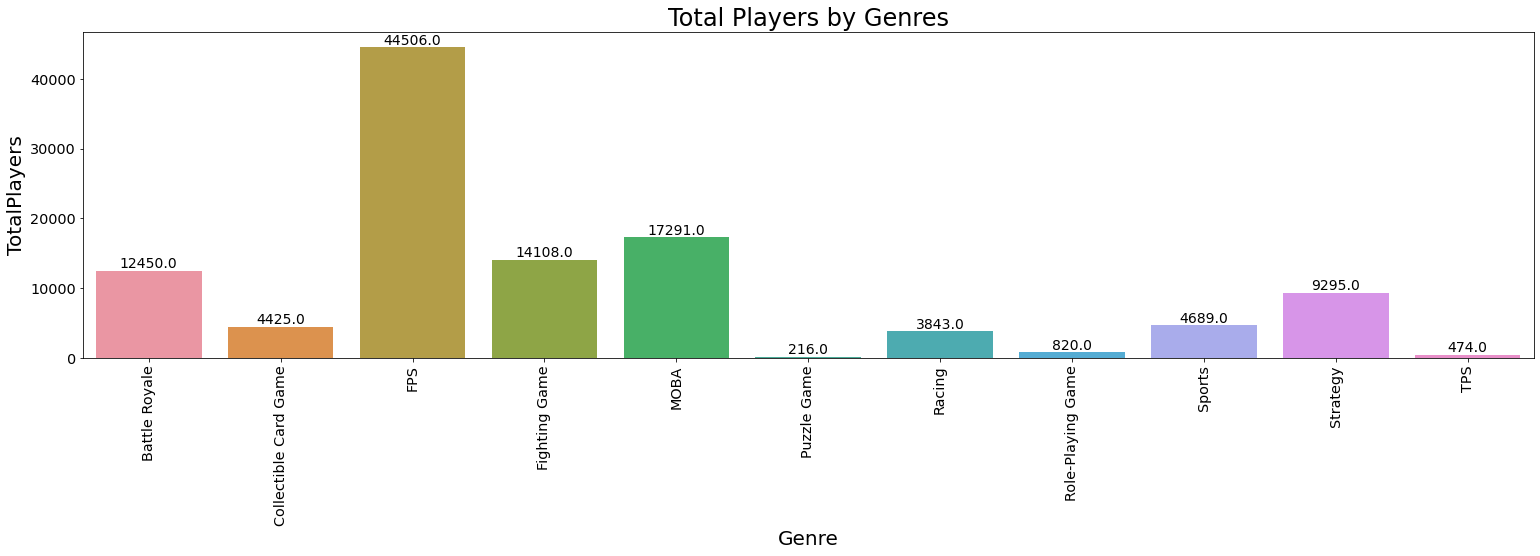

In [48]:
esport_domination_avgprize = esport.groupby("Genre").agg({"TotalPlayers": np.sum})
esport_domination_avgprize.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Genre", y="TotalPlayers", data = esport_domination_avgprize)
plt.title("Total Players by Genres", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

f.	A yearly look at earnings and tournaments.

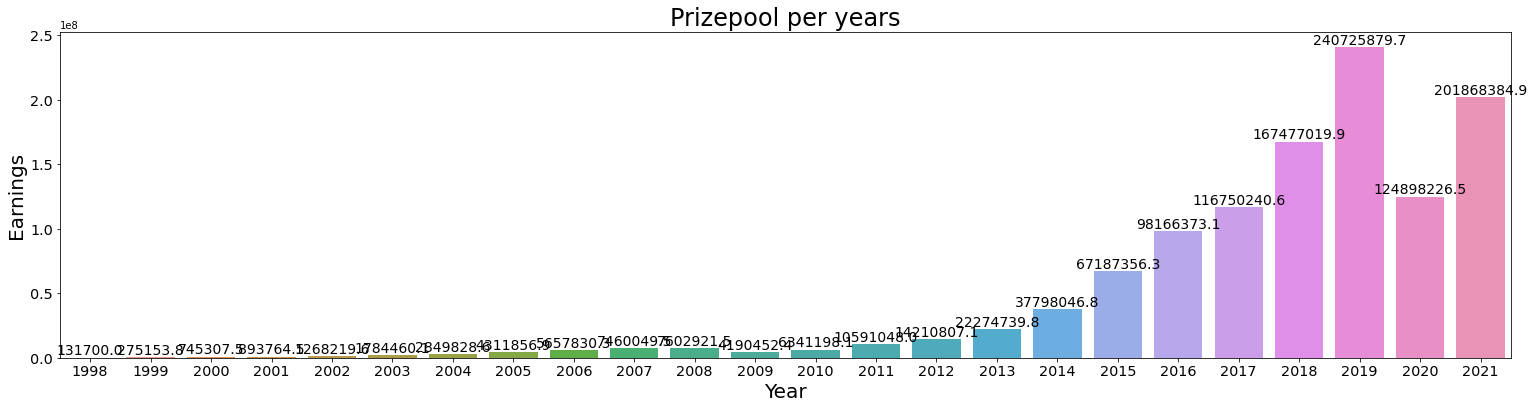

In [37]:
esport_earning_yearly = tour_esport.groupby("Year").agg({"Earnings": np.sum})
esport_earning_yearly.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Year", y="Earnings", data = esport_earning_yearly)
plt.title("Prizepool per years", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

We can see that the Esports industry picked up towards 2011 - 2012, reaching a whopping 228.9 miliion dollar in prizes distributed in 2019.
Also it is interesting to note that was a small dip earnings in 2009, probably caused by the 2008 - 2009 economic crisis.

As we all know, 2020 was a special not an ordinary year as the coronavirus pandemic has and is distrupting many industries, with the Esport industry being one of them. We see a massive decrease in earnings when compared to prior years.


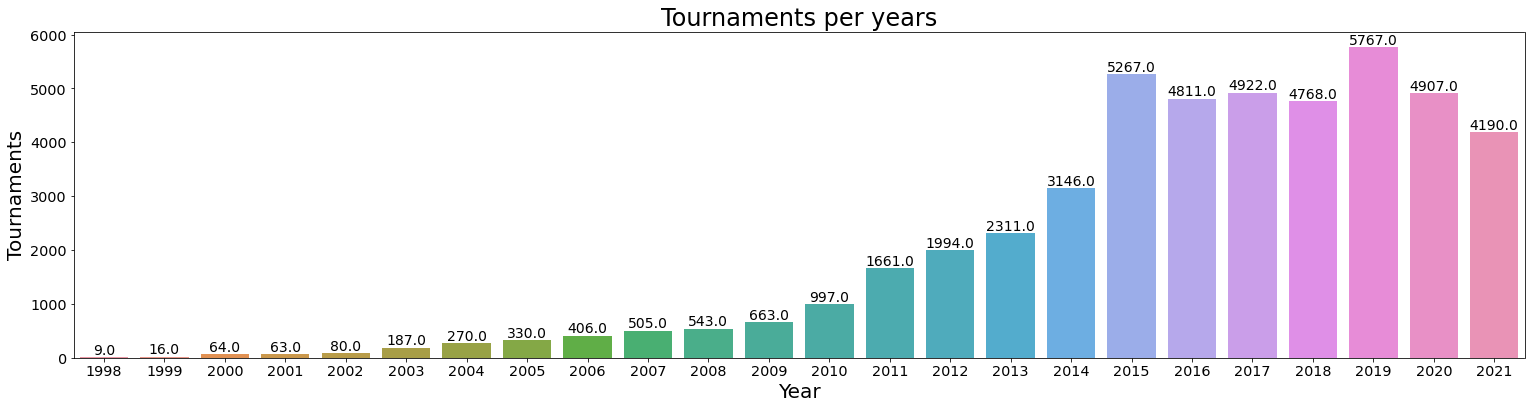

In [38]:
esport_Tournaments_yearly = tour_esport.groupby("Year").agg({"Tournaments": np.sum})
esport_Tournaments_yearly.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Year", y="Tournaments", data = esport_Tournaments_yearly)
plt.title("Tournaments per years", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

Tournament wise, we see that the number of tournaments started to skyrocket in 2011, stabilizing at the 4500 - 5500 range from 2015 onwards.

Now let’s look at the monthly data: is there a specific period where there are more tournaments and more prize earnings?

g. A monthly look at earnings and tournaments.

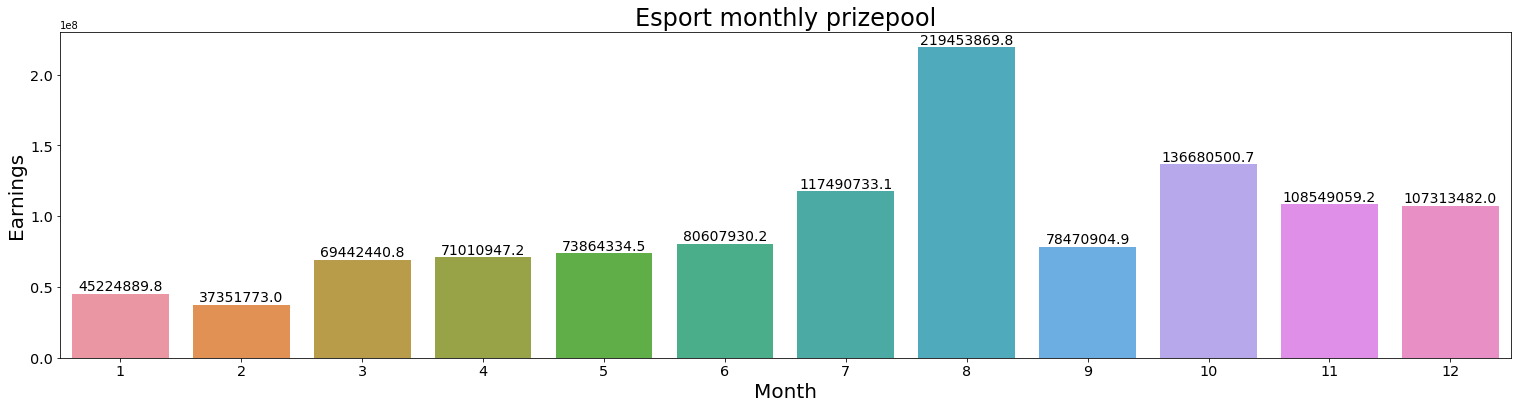

In [39]:
esport_earning_monthly = tour_esport.groupby("Month").agg({"Earnings": np.sum})
esport_earning_monthly.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Month", y="Earnings", data = esport_earning_monthly)
plt.title("Esport monthly prizepool", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

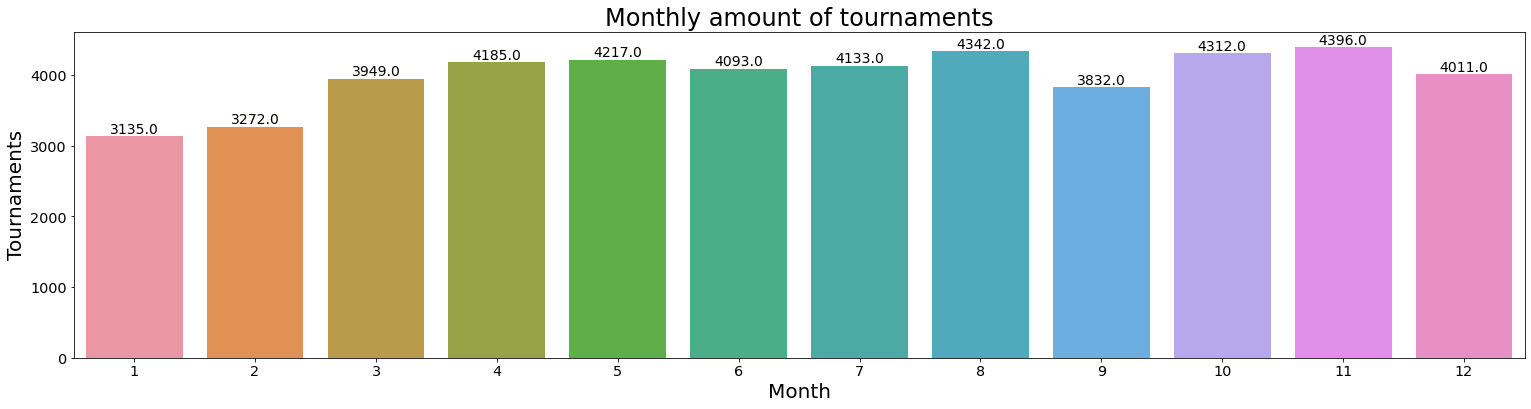

In [40]:
esport_tournament_monthly = tour_esport.groupby("Month").agg({"Tournaments": np.sum})
esport_tournament_monthly.reset_index(inplace=True)
plt.figure(figsize=(26,6))
ax = sns.barplot(x="Month", y="Tournaments", data = esport_tournament_monthly)
plt.title("Monthly amount of tournaments", fontsize=24)
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

We can see that the majority of the earnings come from the months of july and august.
Regarding the amount of tournaments, we notice that the beggining of the year is a mostly a dry period for tournaments, with august and november being the peak months with the most amount of tournaments.

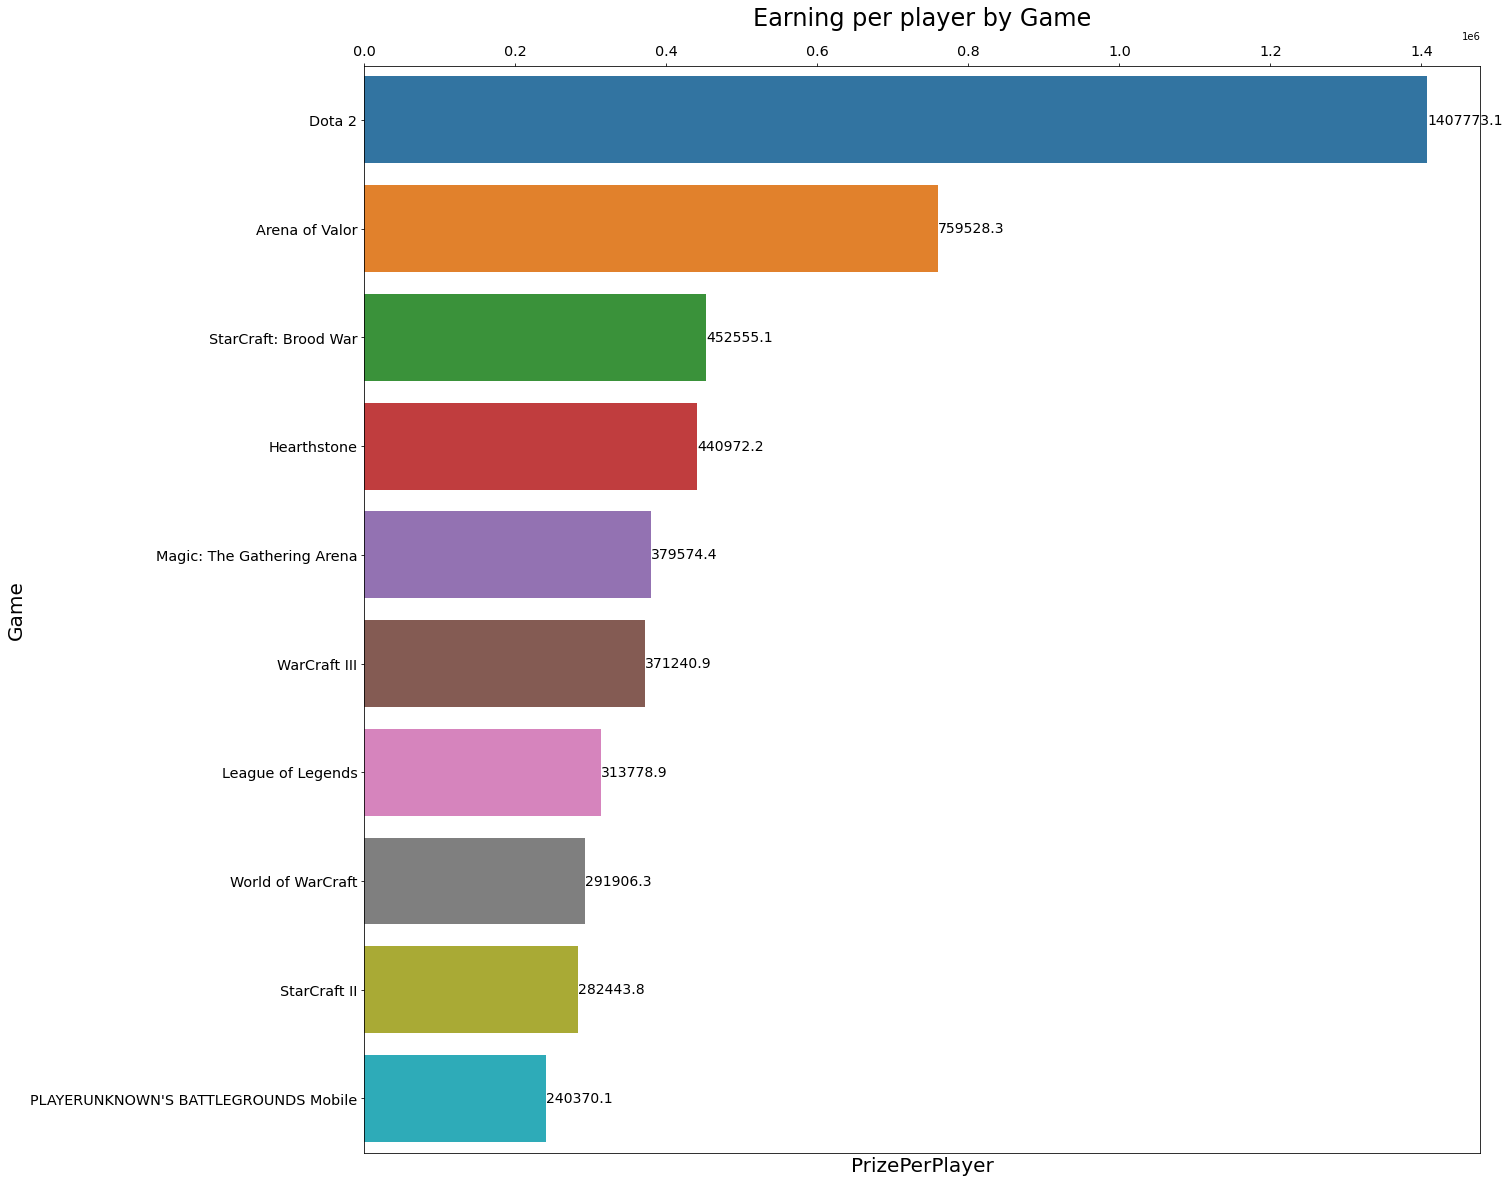

In [54]:
game_domination = tour_esport.groupby("Game").agg({"PrizePerPlayer": np.sum})
game_domination = game_domination.sort_values(by=["PrizePerPlayer"], ascending=False)
pd.set_option('mode.use_inf_as_na', True)
game_domination.dropna()
game_domination = game_domination.head(10)
game_domination.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Earning per player by Game", fontsize=24)
ax = sns.barplot(x="PrizePerPlayer", y="Game", data=game_domination, ci=None)
ax.xaxis.tick_top()
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',size=14)
plt.show()

And you also can see the huge different of Prizepool of Dota 2 compare with other game in the Esport. It is double higher than the second place, which is Arena of Valor. It is because the Dota 2 biggest tournament - “The International” have had a prize pool of around 40 million dollars.
That is also an suppired that Arena of Valor is an mobile game but they have a second biggest prize pool compared to other games because the mobile companies also contribute into the prize pool (not only the game company)

4. Conclusions

We have learned a few things about the Esport industry

a.Prize money is extremely concentrated between a few games, this is less of the case in the amount of tournaments.

b.Dota 2 is the game with the most earnings, StarCraft II the one with the most tournaments to date.

c.The summer (july - august) is the period with the most earning in the year, the winter (january - february) is the weakest period.

d.Tournament wise, january and february are the months with the lowest amount of tournaments, the rest of the year is stable.

f.The industry is mostly dominated by the MOBA and Battle Royale genres

g.The coronavirus pandemic has hit hard the Esport scence, the effect could be seen in earnings and amounts of tournaments from the month march to present times, and there are no doubts that the industry will be affected for a longer period.

h. Finally, it is clear that the esport industry is on the rise, and it will be interesting to see how it will develop in the next couple of years.

